In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ASL/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/asl')


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Convolution2D, MaxPooling2D, Flatten, Dense , Dropout
from keras.callbacks import ModelCheckpoint



In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
import cv2,os


In [ ]:

# Define the path to your dataset
dataset_path = '/content/asl/'



In [ ]:
categories=os.listdir(dataset_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [ ]:
data_path='/content/asl/train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['1', 'w', '0', '6', 'd', '3', 'u', 'p', 'x', '5', '8', '4', 'z', '7', 't', 'i', 'c', 'h', 'o', 'k', '2', 'n', 'l', 'v', 'b', 'y', 'f', 'm', 'g', 's', 'r', 'e', 'a', '9', 'j', 'q']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [ ]:
data_path='/content/asl/'


In [ ]:
label_classes_dict=dict(zip(classesf,labels_classes))
print(label_classes_dict)

{'1': 0, 'w': 1, '0': 2, '6': 3, 'd': 4, '3': 5, 'u': 6, 'p': 7, 'x': 8, '5': 9, '8': 10, '4': 11, 'z': 12, '7': 13, 't': 14, 'i': 15, 'c': 16, 'h': 17, 'o': 18, 'k': 19, '2': 20, 'n': 21, 'l': 22, 'v': 23, 'b': 24, 'y': 25, 'f': 26, 'm': 27, 'g': 28, 's': 29, 'r': 30, 'e': 31, 'a': 32, '9': 33, 'j': 34, 'q': 35}


In [ ]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:

    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


                resized=cv2.resize(res,(img_size,img_size))


                data.append(resized)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)





/content/asl/test
['1', 'w', '0', '6', 'd', '3', 'u', 'p', 'x', '5', '8', '4', 'z', '7', 't', 'i', 'c', 'h', 'o', 'k', '2', 'n', 'l', 'v', 'b', 'y', 'f', 'm', 'g', 's', 'r', 'e', 'a', '9', 'j', 'q']
/content/asl/test/1
/content/asl/test/w
/content/asl/test/0
/content/asl/test/6
/content/asl/test/d
/content/asl/test/3
/content/asl/test/u
/content/asl/test/p
/content/asl/test/x
/content/asl/test/5
/content/asl/test/8
/content/asl/test/4
/content/asl/test/z
/content/asl/test/7
/content/asl/test/t
/content/asl/test/i
/content/asl/test/c
/content/asl/test/h
/content/asl/test/o
/content/asl/test/k
/content/asl/test/2
/content/asl/test/n
/content/asl/test/l
/content/asl/test/v
/content/asl/test/b
/content/asl/test/y
/content/asl/test/f
/content/asl/test/m
/content/asl/test/g
/content/asl/test/s
/content/asl/test/r
/content/asl/test/e
/content/asl/test/a
/content/asl/test/9
/content/asl/test/j
/content/asl/test/q
/content/asl/train
['1', 'w', '0', '6', 'd', '3', 'u', 'p', 'x', '5', '8', '4', '

In [ ]:
datanp=np.array(data)
datanp.shape

(2514, 128, 128)

In [ ]:
targetnp=np.array(target)

targetnp.shape

(2514,)

In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)


new_target=to_categorical(target)
new_target.shape

(2514, 36)

In [ ]:
np.save('data_img',data)
np.save('target',new_target)

In [ ]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1" #https://catalyst-team.github.io/catalyst/v21.03/faq/dp.html
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=36, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
print(train_data.shape)

(2011, 128, 128, 1)


In [ ]:
history=classifier.fit(train_data,train_target,shuffle=True,epochs=100,validation_split=0.3)

Epoch 1/100
44/44 [==============================] - 47s 1s/step - loss: 0.4234 - accuracy: 0.8458 - val_loss: 0.2737 - val_accuracy: 0.9156
Epoch 2/100
44/44 [==============================] - 36s 824ms/step - loss: 0.3647 - accuracy: 0.8593 - val_loss: 0.2709 - val_accuracy: 0.9156
Epoch 3/100
44/44 [==============================] - 36s 820ms/step - loss: 0.3877 - accuracy: 0.8678 - val_loss: 0.2663 - val_accuracy: 0.9106
Epoch 4/100
44/44 [==============================] - 37s 851ms/step - loss: 0.3721 - accuracy: 0.8770 - val_loss: 0.2804 - val_accuracy: 0.9056
Epoch 5/100
44/44 [==============================] - 33s 748ms/step - loss: 0.3202 - accuracy: 0.8856 - val_loss: 0.2758 - val_accuracy: 0.9007
Epoch 6/100
44/44 [==============================] - 36s 814ms/step - loss: 0.3699 - accuracy: 0.8699 - val_loss: 0.2689 - val_accuracy: 0.9189
Epoch 7/100
44/44 [==============================] - 35s 806ms/step - loss: 0.3462 - accuracy: 0.8884 - val_loss: 0.2623 - val_accuracy: 0.

In [ ]:
print(classifier.evaluate(test_data,test_target))

16/16 [==============================] - 4s 240ms/step - loss: 0.2390 - accuracy: 0.9344
[0.23895233869552612, 0.9343936443328857]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
classifier.save('/content/drive/MyDrive/ASL/asl_classifier.h5')


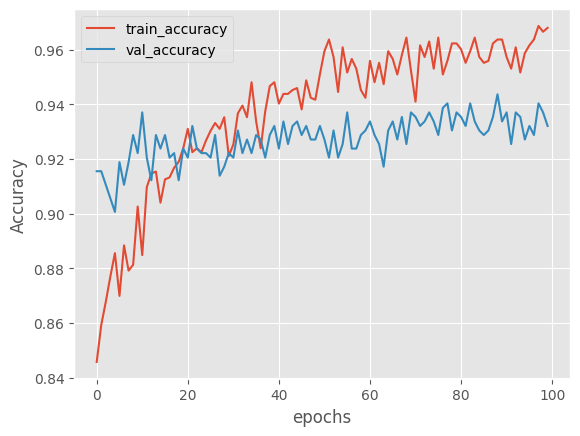

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()